In [1]:
import pandas as pd
import networkx as nx
import collections
import itertools as it
import matplotlib.pyplot as plt
import numpy as np
import random
from pandas.plotting import table
import matplotlib.image as mpimg
from io import BytesIO
import graphviz
import pylab


In [2]:
df_ciclos_cruzados = pd.read_csv('/home/gustavo/Downloads/Redes/Tabelas_Gerada/df_ciclos_cruzados.csv', delimiter = ',')

In [3]:
#Tabela 3
df_ciclos_cruzados

,10_nome_deputado_y,11_valor_doado_by,12_qtde_doacoes_by,13_valor_reembolsado_ya,14_qtde_reembolsos_ya,1_id_empresa_a,2_nome_empresa_a,3_nome_deputado_x,4_valor_doado_ax,5_qtde_doacoes_ax,6_id_empresa_b,7_nome_empresa_b,8_valor_reembolsado_xb,9_qtde_reembolsos_xb
0,LUCIANO DUCCI,2899.02,1,192336.23,21,77637684000161,COTRANS LOCAÇÃO DE VEÍCULOS LTDA.,FERNANDO DESTITO FRANCISCHINI,21610.00,2,5289078000191,POSTO CANAL ALPHA LTDA.,150.00,1
1,REINHOLD STEPHANES,4500.00,2,15400.00,7,77637684000161,COTRANS LOCAÇÃO DE VEÍCULOS LTDA.,FERNANDO DESTITO FRANCISCHINI,21610.00,2,76637305000170,EDITORA JORNAL DO ESTADO LTDA,20000.00,1
2,LUCIANO DUCCI,11596.00,1,192336.23,21,77637684000161,COTRANS LOCAÇÃO DE VEÍCULOS LTDA.,ANTONIO WANDSCHEER,20000.00,1,8035554000136,POSTO CAMINHO DO PARQUE LTDA.,244.34,2
3,LUCIANO DUCCI,17394.00,2,192336.23,21,77637684000161,COTRANS LOCAÇÃO DE VEÍCULOS LTDA.,OSMAR STUART BERTOLDI,57396.45,2,15291223000122,POSTO TOP HAMMER LTDA,167.24,1
4,LUCIANO DUCCI,11596.00,1,192336.23,21,77637684000161,COTRANS LOCAÇÃO DE VEÍCULOS LTDA.,OSMAR STUART BERTOLDI,57396.45,2,8035554000136,POSTO CAMINHO DO PARQUE LTDA.,766.79,4
5,ALEX CANZIANI SILVEIRA,3465.85,1,3299.90,6,82423096000165,TRIBUNA NO NORTE,RUBENS BUENO,6800.00,1,5898810000120,AUTO POSTO NORTE DO PARANÁ LTDA.,158.09,1
6,LUIS HENRIQUE DE OLIVEIRA RESENDE,2550.00,1,354.18,4,3665115000193,POSTO MARIO WERNECK LTDA,RODRIGO OTAVIO SOARES PACHECO,15000.00,1,26198515000484,SEMPRE EDITORA LTDA.,669.10,14
7,LAUDIVIO ALVARENGA CARVALHO,21947.40,4,837.68,8,3665115000193,POSTO MARIO WERNECK LTDA,RODRIGO OTAVIO SOARES PACHECO,15000.00,1,26198515000484,SEMPRE EDITORA LTDA.,669.10,14
8,MARCELO GUILHERME DE ARO FERREIRA,7816.00,1,251.40,5,26198515000484,SEMPRE EDITORA LTDA.,LAUDIVIO ALVARENGA CARVALHO,21947.40,4,15739283000165,VIDA NOVA LIVRARIA E PAPELARIA EIRELI,549.00,2


In [45]:
df = df_ciclos_cruzados.loc[df_ciclos_cruzados['10_nome_deputado_y'] == 'REINHOLD STEPHANES']

In [46]:
df.to_dict()

{'10_nome_deputado_y': {1: 'REINHOLD STEPHANES'},
 '11_valor_doado_by': {1: 4500.0},
 '12_qtde_doacoes_by': {1: 2},
 '13_valor_reembolsado_ya': {1: 15400.0},
 '14_qtde_reembolsos_ya': {1: 7},
 '1_id_empresa_a': {1: 77637684000161},
 '2_nome_empresa_a': {1: 'COTRANS LOCAÇÃO DE VEÍCULOS LTDA.'},
 '3_nome_deputado_x': {1: 'FERNANDO DESTITO FRANCISCHINI'},
 '4_valor_doado_ax': {1: 21610.0},
 '5_qtde_doacoes_ax': {1: 2},
 '6_id_empresa_b': {1: 76637305000170},
 '7_nome_empresa_b': {1: 'EDITORA JORNAL DO ESTADO LTDA'},
 '8_valor_reembolsado_xb': {1: 20000.0},
 '9_qtde_reembolsos_xb': {1: 1},
 'log_by': {1: 8.412},
 'log_ya': {1: 9.642},
 'log_ax': {1: 9.981},
 'log_xb': {1: 9.903}}

In [4]:
df_ciclos_cruzados['log_by'] = df_ciclos_cruzados['11_valor_doado_by'].apply(
lambda x: round(np.log(x),3))
df_ciclos_cruzados['log_ya'] = df_ciclos_cruzados['13_valor_reembolsado_ya'].apply(
lambda x: round(np.log(x),3))
df_ciclos_cruzados['log_ax'] = df_ciclos_cruzados['4_valor_doado_ax'].apply(
lambda x: round(np.log(x),3))
df_ciclos_cruzados['log_xb'] = df_ciclos_cruzados['8_valor_reembolsado_xb'].apply(
lambda x: round(np.log(x),3))

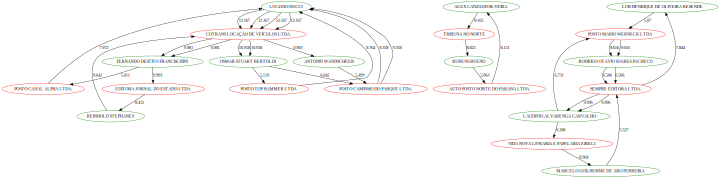

In [47]:
G = nx.MultiDiGraph()

G.add_nodes_from(df_ciclos_cruzados['10_nome_deputado_y'], bipartite = 0)
G.add_nodes_from(df_ciclos_cruzados['3_nome_deputado_x'], bipartite = 0)
deputado = [v for v in G.nodes() if G.nodes[v]['bipartite'] == 0]

G.add_nodes_from(df_ciclos_cruzados['2_nome_empresa_a'], bipartite = 1)
G.add_nodes_from(df_ciclos_cruzados['7_nome_empresa_b'], bipartite = 1)
empresa = [v for v in G.nodes() if G.nodes[v]['bipartite'] == 1]

G.add_weighted_edges_from(df_ciclos_cruzados[['10_nome_deputado_y', '2_nome_empresa_a', 'log_ya']].values)
G.add_weighted_edges_from(df_ciclos_cruzados[['7_nome_empresa_b','10_nome_deputado_y', 'log_by']].values)
G.add_weighted_edges_from(df_ciclos_cruzados[['2_nome_empresa_a','3_nome_deputado_x', 'log_ax']].values)
G.add_weighted_edges_from(df_ciclos_cruzados[['3_nome_deputado_x','7_nome_empresa_b', 'log_xb']].values)

d =graphviz.Digraph(format='png')
for n in deputado:
    d.node(str(n),color='green' , size = '5')

for n in empresa:
    d.node(str(n),color='red', size = '5')


for (u,v,w) in G.edges(data='weight'):
    #dic = dict(G[u][v][w])
    d.edge(str(u), str(v), label=str(G[u][v][0]['weight']))
    

d.attr(shape='star', size='10')

# To display the graph on Jupyter
d.engine='dot'
d.render('/home/gustavo/Downloads/Redes/Imagens_trabalho/Retorno_indireto')
d


In [15]:
G.number_of_nodes()

21

In [16]:
G.number_of_edges()

36

In [17]:
len(deputado)

11

In [18]:
len(empresa)

10

In [22]:
nx.density(G)

0.08571428571428572

In [21]:
nx.degree(G)

DiMultiDegreeView({'LUCIANO DUCCI': 8, 'REINHOLD STEPHANES': 2, 'ALEX CANZIANI SILVEIRA': 2, 'LUIS HENRIQUE DE OLIVEIRA RESENDE': 2, 'LAUDIVIO ALVARENGA CARVALHO': 4, 'MARCELO GUILHERME DE ARO FERREIRA': 2, 'FERNANDO DESTITO FRANCISCHINI': 4, 'ANTONIO WANDSCHEER': 2, 'OSMAR STUART BERTOLDI': 4, 'RUBENS BUENO': 2, 'RODRIGO OTAVIO SOARES PACHECO': 4, 'COTRANS LOCAÇÃO DE VEÍCULOS LTDA.': 10, 'TRIBUNA NO NORTE': 2, 'POSTO MARIO WERNECK LTDA': 4, 'SEMPRE EDITORA LTDA.': 6, 'POSTO CANAL ALPHA LTDA.': 2, 'EDITORA JORNAL DO ESTADO LTDA': 2, 'POSTO CAMINHO DO PARQUE LTDA.': 4, 'POSTO TOP HAMMER LTDA': 2, 'AUTO POSTO NORTE DO PARANÁ LTDA.': 2, 'VIDA NOVA LIVRARIA E PAPELARIA EIRELI': 2})

In [21]:
import operator
dic = dict(nx.degree(G))
dic = sorted(dic.items(), key = operator.itemgetter(1), reverse=True)
dic = dict(dic)
sum(dic.values())/len(dic)

3.4285714285714284

In [20]:
import operator
dic = dict(nx.degree_centrality(G))
dic = sorted(dic.items(), key = operator.itemgetter(1), reverse=True)
dic = dict(dic)
dic

{'COTRANS LOCAÇÃO DE VEÍCULOS LTDA.': 0.5,
 'LUCIANO DUCCI': 0.4,
 'SEMPRE EDITORA LTDA.': 0.30000000000000004,
 'LAUDIVIO ALVARENGA CARVALHO': 0.2,
 'FERNANDO DESTITO FRANCISCHINI': 0.2,
 'OSMAR STUART BERTOLDI': 0.2,
 'RODRIGO OTAVIO SOARES PACHECO': 0.2,
 'POSTO MARIO WERNECK LTDA': 0.2,
 'POSTO CAMINHO DO PARQUE LTDA.': 0.2,
 'REINHOLD STEPHANES': 0.1,
 'ALEX CANZIANI SILVEIRA': 0.1,
 'LUIS HENRIQUE DE OLIVEIRA RESENDE': 0.1,
 'MARCELO GUILHERME DE ARO FERREIRA': 0.1,
 'ANTONIO WANDSCHEER': 0.1,
 'RUBENS BUENO': 0.1,
 'TRIBUNA NO NORTE': 0.1,
 'POSTO CANAL ALPHA LTDA.': 0.1,
 'EDITORA JORNAL DO ESTADO LTDA': 0.1,
 'POSTO TOP HAMMER LTDA': 0.1,
 'AUTO POSTO NORTE DO PARANÁ LTDA.': 0.1,
 'VIDA NOVA LIVRARIA E PAPELARIA EIRELI': 0.1}

In [28]:
#Distribuição de grau
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) 
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

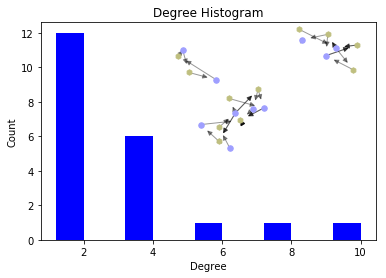

In [31]:
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.strongly_connected_component_subgraphs(G), key=len, reverse=True)[0]
plt.axis('off')
pos = nx.spring_layout(G, k=0.9)
nx.draw_networkx_nodes(G, pos, nodelist = deputado, node_color='#bfbf7f', node_shape="h", node_size=30)
nx.draw_networkx_nodes(G, pos, nodelist = empresa, node_color='#9f9fff', node_size=30)
nx.draw_networkx_edges(G, pos, alpha=0.4)
plt.savefig('/home/gustavo/Downloads/Redes/Imagens_trabalho/Distribuição_Grau_Retorno_indireto.png')
plt.show()

In [29]:
import networkx.algorithms.community as nxcom
result = nxcom.girvan_newman(G)
communities = next(result)
len(communities)

4

In [37]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1
            
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

In [31]:
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

In [38]:
# Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)

# Set community color for nodes
node_color = [get_color(G[v]['community']) for v in G.nodes()]

# Set community color for internal edges
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

ValueError: too many values to unpack (expected 2)